## Objective : How Sales is impacted by TV ad, Radio Ad , Newspaper AD?

In [1]:
# import the library
import pandas as pd # handle the data set
import numpy as np # numerical python
import matplotlib.pyplot as plt # data visualisation library

#### Read and understand data

In [2]:
# read the csv file
df = pd.read_csv('Advertising Budget and Sales.csv',index_col=0)
# display first five rows
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# change the columns names
df.columns = ['TV','Radio','Newspaper','Sales']
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# check number of rows and columns
df.shape # 200 rows and 4columns

(200, 4)

In [5]:
# check null values
df.isna().sum() # this has no null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
# check the data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
# check the statistical summary
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Visualise the data

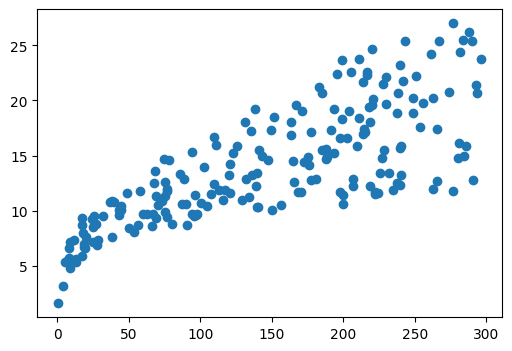

In [8]:
## Find the relation between variable we use scatter plot
# relation between TV and sales
plt.figure(figsize=(6,4))
plt.scatter(x=df.TV, y=df.Sales)
plt.show()

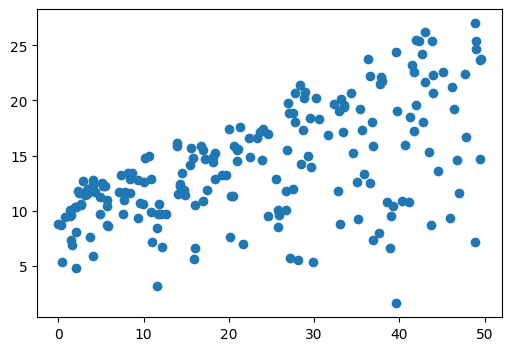

In [9]:
## Find the relation between variable we use scatter plot
# relation between Radio and sales
plt.figure(figsize=(6,4))
plt.scatter(x=df.Radio, y=df.Sales)
plt.show()

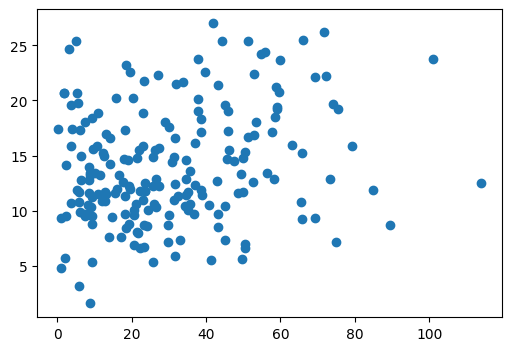

In [10]:
## Find the relation between variable we use scatter plot
# relation between Newspaper and sales
plt.figure(figsize=(6,4))
plt.scatter(x=df.Newspaper, y=df.Sales)
plt.show()

In [11]:
# Correlation
# value lies between -1 and 1
# 1 perfect postive corelation , as y increase x also increases
# -1 perfect negative correlation , as y increase  x will decrease
# any value between greater then 0.5 (positive or negative) indicates high correlation
# corr is the function
df.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


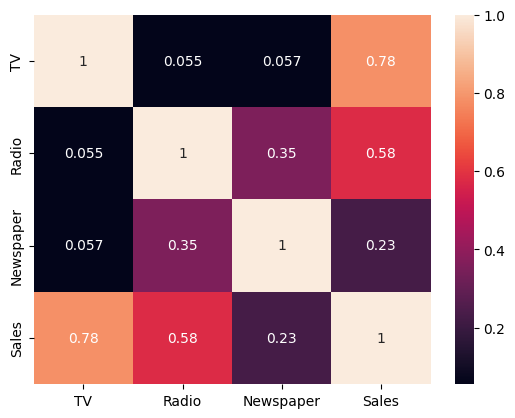

In [12]:
#visualise the correlation using heat map
import seaborn as sns # seaborn is data visualisation library
sns.heatmap(df.corr(), annot= True)
plt.show()

#### Perform Simple linear regression
- y = mx +c (equation for a=staright line)
- y will take sales , x will take as TV
- sales = m(TV) + c 
- Find best fit line by minimising the error.

#### Split X and y

In [13]:
# Define X and y
X= df[['TV']] # two square brackets , series was converted to data frame
y=df['Sales']

In [14]:
X.shape

(200, 1)

In [15]:
X.head()

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8


In [16]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

#### Split Train and test
- Train data will be used for training the model
- Test will be used for testing

In [17]:
# import the library for train-test split
# test = 20% , train = 80%
from sklearn.model_selection import train_test_split
X_train_lm,X_test_lm, y_train_lm, y_test_lm = train_test_split(X,y , test_size=0.2 , random_state=21)

In [18]:
# check the shape
X_train_lm.shape

(160, 1)

#### Build the linear model

In [19]:
# import the library for linear model from sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [20]:
# Train the model using fit method
lm.fit(X_train_lm,y_train_lm)

LinearRegression()

In [22]:
# Value of m and c 
print('Value of m is: ', lm.coef_)
print('Value of c is: ', lm.intercept_)


Value of m is:  [0.04574335]
Value of c is:  7.230713738761318


#### Predict the values for test

In [23]:
# use predict function to test for our test set
y_pred = lm.predict(X_test_lm)

#### Evaluate our model

In [26]:
# RMSE (root mean squared error and R^2)
from sklearn.metrics import mean_squared_error , r2_score
# RMSE
np.sqrt(mean_squared_error(y_test_lm,y_pred))

3.240057238560755

In [27]:
# R^2
r2_score(y_test_lm,y_pred) # 70 % of variation is explained by TV

0.7035304268409084

### Visualise the fit on the test set

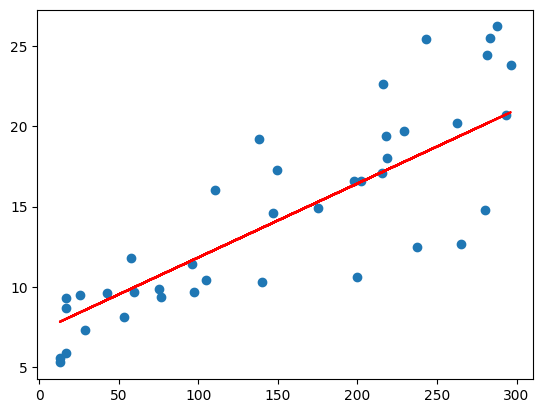

In [29]:
plt.scatter(X_test_lm,y_test_lm) # plot for actual
plt.plot(X_test_lm, 0.046*X_test_lm + 7.23 , 'r') # plot for predicted
plt.show()

#### Multiple Linear Regression

In [33]:
# Multiple linear regression has more than one independent variable
# Define X(feature) any y(response,label, target)
X_mlr = df[['TV','Radio','Newspaper']]
y_mlr = df['Sales']

In [34]:
# Split into train and test
X_train_mlr,X_test_mlr,y_train_mlr,y_test_mlr = train_test_split(X_mlr,y_mlr, test_size=0.2, random_state=21)

In [36]:
# check the shape
X_train_mlr.shape

(160, 3)

In [37]:
# Train the model using fit method
lm.fit(X_train_mlr,y_train_mlr)

LinearRegression()

In [39]:
# use predict function to test for our test set
y_pred = lm.predict(X_test_mlr)

In [40]:
# RMSE (root mean squared error and R^2)
from sklearn.metrics import mean_squared_error , r2_score
# RMSE
np.sqrt(mean_squared_error(y_test_mlr,y_pred))

1.6611334844530619

In [41]:
# R^2
r2_score(y_test_mlr,y_pred) # 92 % of variation is explained by TV,radio and newspaper

0.9220737408493859

In [42]:
# Value of m and c 
print('Value of m is: ', lm.coef_)
print('Value of c is: ', lm.intercept_)

Value of m is:  [ 0.04621061  0.19146787 -0.00164059]
Value of c is:  2.7492664418909865


In [46]:
mlr_coef = pd.DataFrame(data=lm.coef_ , index = X_train_mlr.columns , columns=['Slope'])
mlr_coef

,Slope
TV,0.046211
Radio,0.191468
Newspaper,-0.001641


In [48]:
# y(sales) = 0.046*TV + 0.19*radio - 0.002*newspaper + 2.75